<a href="https://colab.research.google.com/github/KOO-96/Capston_Suwon-univ./blob/main/%EC%A4%91%EA%B0%84%EB%B0%9C%ED%91%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras

In [2]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# 첫번째 훈련 데이터 확인
import numpy as np
np.set_printoptions(linewidth=200,threshold=1000)

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

In [4]:
# label은 총 10개로 분류.
class_names=['Tshirt/top','Troser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

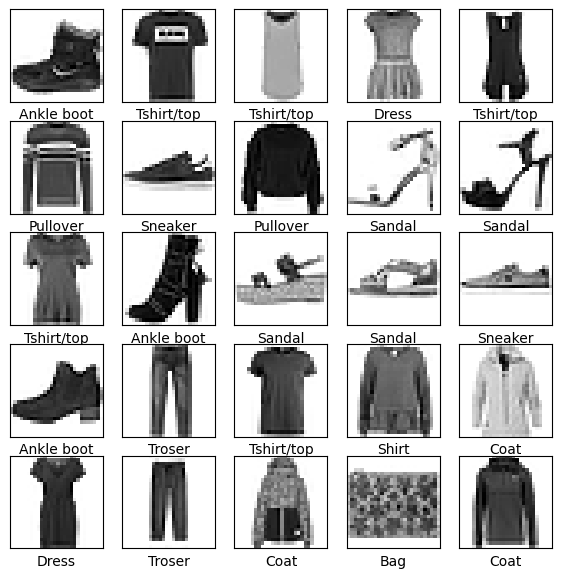

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 데이터 전처리

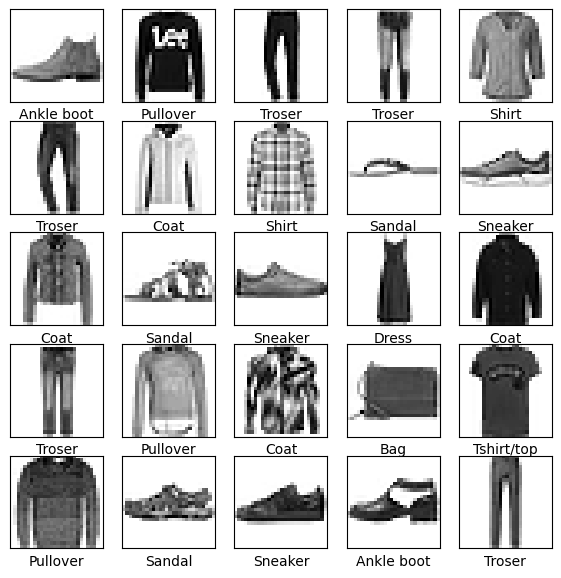

In [6]:
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

Epoch 1/20
469/469 [==============================] - 45s 94ms/step - loss: 0.5339 - accuracy: 0.8074 - val_loss: 0.3877 - val_accuracy: 0.8587
Epoch 2/20
469/469 [==============================] - 44s 95ms/step - loss: 0.3492 - accuracy: 0.8735 - val_loss: 0.3332 - val_accuracy: 0.8805
Epoch 3/20
469/469 [==============================] - 44s 93ms/step - loss: 0.3057 - accuracy: 0.8900 - val_loss: 0.3061 - val_accuracy: 0.8882
Epoch 4/20
469/469 [==============================] - 44s 93ms/step - loss: 0.2733 - accuracy: 0.9004 - val_loss: 0.3042 - val_accuracy: 0.8877
Epoch 5/20
469/469 [==============================] - 44s 93ms/step - loss: 0.2533 - accuracy: 0.9078 - val_loss: 0.2915 - val_accuracy: 0.8940
Epoch 6/20
469/469 [==============================] - 43s 93ms/step - loss: 0.2325 - accuracy: 0.9150 - val_loss: 0.2621 - val_accuracy: 0.9028
Epoch 7/20
469/469 [==============================] - 43s 93ms/step - loss: 0.2150 - accuracy: 0.9205 - val_loss: 0.2697 - val_accuracy:

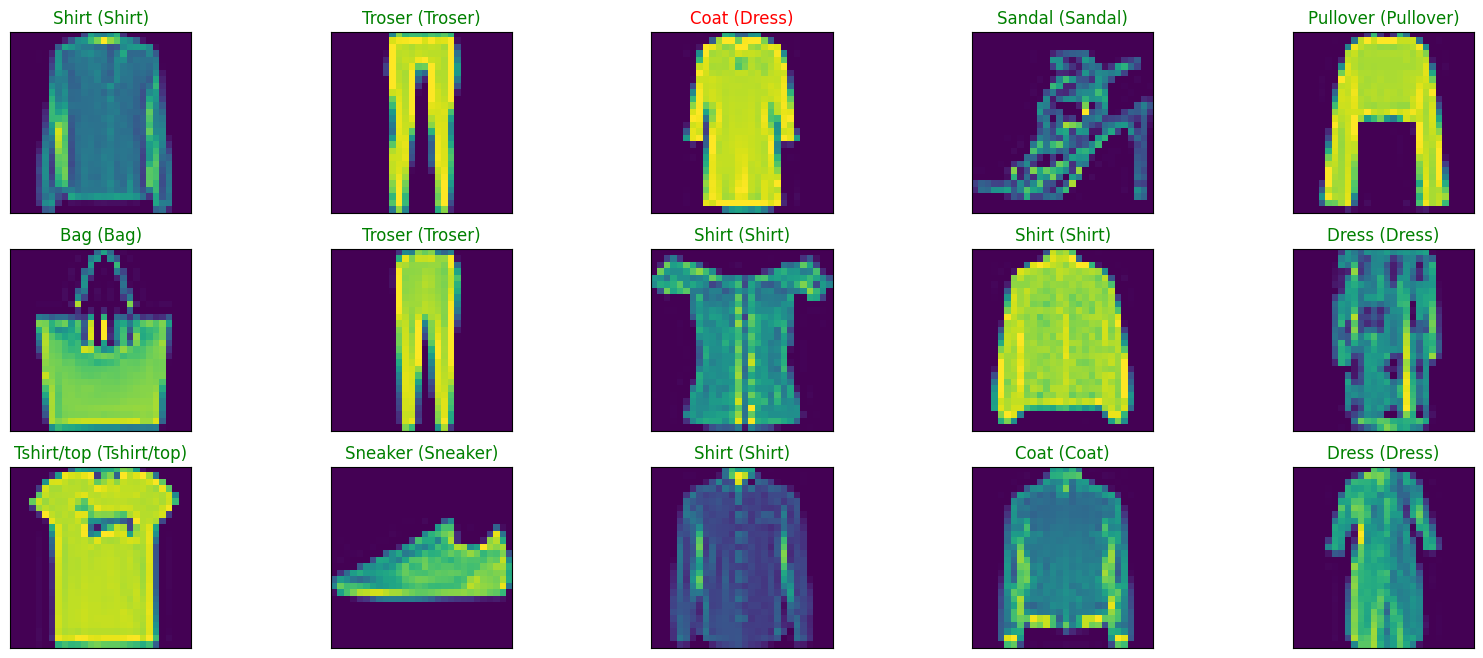

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical


class CNN:
    def __init__(self, input_shape=(28, 28, 1), num_classes=10):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.model = self.build_model()

    def build_model(self):
        input_layer = Input(shape=self.input_shape)
        conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
        maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
        conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool1)
        maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
        flatten = Flatten()(maxpool2)
        fc1 = Dense(128, activation='relu')(flatten)
        output_layer = Dense(self.num_classes, activation='softmax')(fc1)

        model = Model(inputs=input_layer, outputs=output_layer)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        return model

    def load_data(self):
        (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
        x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
        x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
        y_train = to_categorical(y_train, num_classes=self.num_classes)
        y_test = to_categorical(y_test, num_classes=self.num_classes)
        return x_train, y_train, x_test, y_test

    def train(self, x_train, y_train, x_test, y_test, epochs=20, batch_size=128):
        history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
        return history

    def evaluate(self, x_test, y_test):
        test_loss, test_acc = self.model.evaluate(x_test, y_test)
        return test_loss, test_acc

if __name__ == "__main__":
    model = CNN()

    # 데이터 로드 및 전처리
    x_train, y_train, x_test, y_test = model.load_data()

    # 모델 학습
    history = model.train(x_train, y_train, x_test, y_test, epochs=20, batch_size=128)

    # 모델 평가
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_acc*100:.2f}%")

    # test데이터 예측
    y_pred = model.model.predict(x_test)

    # 무작위 샘플 15 개의 테스트 이미지의 예측값과 실제값을 확인
    figure = plt.figure(figsize=(20, 8))
    for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
      ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
      ax.imshow(np.squeeze(x_test[index]))
      predict_index = np.argmax(y_pred[index])
      true_index = np.argmax(y_test[index])
      ax.set_title("{} ({})".format(class_names[predict_index],
                                    class_names[true_index]),
                   color=("green" if predict_index == true_index else "red"))

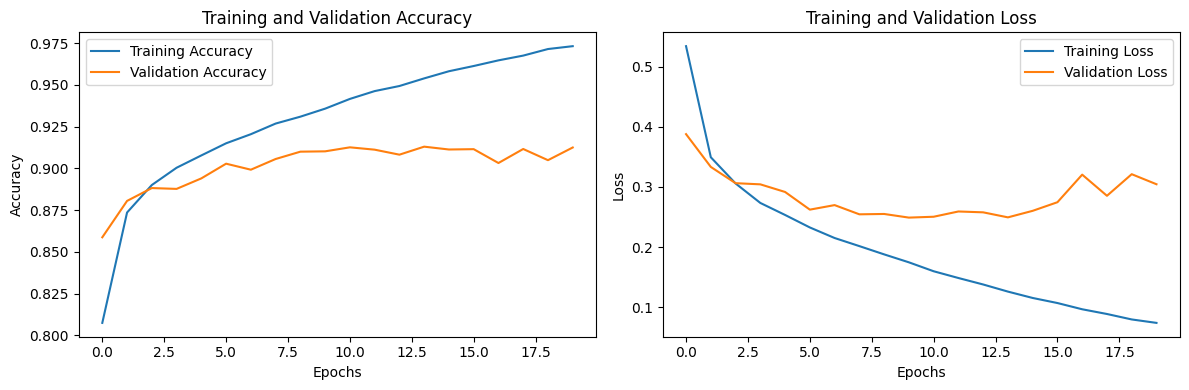

In [10]:
import matplotlib.pyplot as plt

# 정확도와 손실을 추출
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# 정확도 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='best')

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from keras.datasets import fashion_mnist
# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# fashion_mnist 벡터화
vectorized = x_train.reshape(x_train.shape[0], -1)

# 유사도 행렬 생성
similarity = cosine_similarity(vectorized)

def similar_images(y_train, n=5):
    if y_train < 0 or y_train >= len(x_train):
        return "Not found in the list"

    # 입력 이미지와의 유사도 계산
    score = similarity[y_train]

    # 유사도가 높은 상위 5개 이미지
    similar_indices = np.argsort(score)[::-1][:n]

    # 추천 이미지
    recommend = x_train[similar_indices]

    return recommend

# 사용자 입력에 따른 유사한 이미지 추천
user_input_index = 0  # 사용자의 선택 이미지
recommend = similar_images(user_input_index)

Label(0~9 사이의 숫자):6


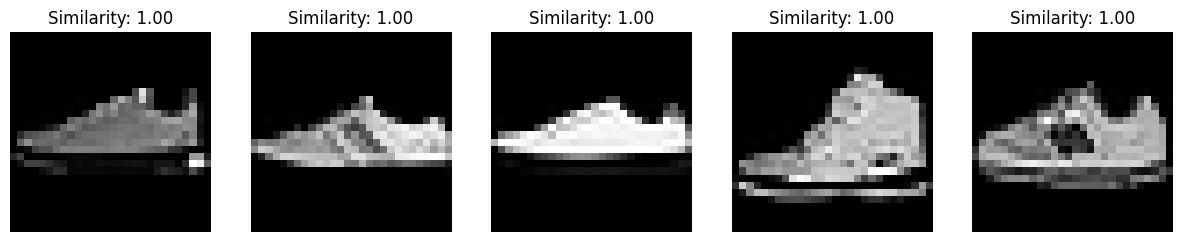

In [5]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# 데이터 로드
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 원-핫 인코딩
num_classes = 10
y_train_sparse = np.zeros((y_train.size, num_classes))
y_train_sparse[np.arange(y_train.size), y_train] = 1

# 선택 이미지 라벨 (직접 지정)
user_selected_label = int(input("Label(0~9 사이의 숫자):"))

# 직접 지정한 라벨값과 가장 유사한 이미지 불러오기
cosine_similarities = cosine_similarity(y_train_sparse, y_train_sparse[user_selected_label].reshape(1, -1))
most_similar_indices = np.argsort(cosine_similarities[:, 0])[::-1][:5]

# 유사한 이미지 출력
plt.figure(figsize=(15, 3))
for i, index in enumerate(most_similar_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Similarity: {cosine_similarities[index, 0]:.2f}")
    plt.axis('off')
plt.show()